# <center> OpenCV with Python </center>

## Problems in Computer Vision

* Camera sensor & lens limitaiton
* View Point Variation
* Changing lighting
* scaling
* Non-rigid deformation
* Occlusion - partially blocked images
* Clutter - noisy background
* Object class variation
* Ambiguous images / Optical illusions

### What are images and representation?
* Images - 2D representaion of visible light spectrum. 
* OpenCV uses **RBG** color space by default.
* Each pixel cordinate(x,y) contains 3 values ranging for intensities of 0 to 255(8 bit).
* images are stored in multi dimentional array.

#### Black and White or Grayscale images - 
* Stored in 2 dimentional array.
* There are 2 type of B&W images.
    * Grayscale - Ranges of shades of gray. 
    * Binary - pixel are either black and white.    

In [1]:
import cv2 
import numpy
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
input = cv2.imread('./images/butterfly.jpg')

cv2.imshow('butterfly',input)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# shape of image
#(height,width)

input.shape

(640, 960, 3)

In [4]:
# save the images in OpenCV

cv2.imwrite('./images/output.jpg',input)

True

### Grayscaling

* Images are converted colored to shades of grey.
* Helps in noise reduction and increase in processing time. 

### Convert color image to grayscale

In [5]:
import cv2

# Load the image

image = cv2.imread('./images/butterfly.jpg')
cv2.imshow('Original',image)
cv2.waitKey()

1048586

In [6]:
# convertion to grayscale
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale',gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# Another faster method to do so

img = cv2.imread('./images/butterfly.jpg',0)
cv2.imshow('Grayscale',img)
cv2.waitKey()
cv2.destroyAllWindows()

## Color Spaces

* RGB, HSV, CMYK
* OpenCV uses RBG, but **actual order is BGR and stored in RGB.**

### HSV Color Space
![HSV](images/HSV.png)

* Hue, Saturation, Value/Brightness represent the color human percieve it.
* Store color information in a cylindrical representation of RGB color points.
    * Hue - Color value (0-179)
    * Saturation - Vibrancy of color (0-255)
    * Value - Brightness or intensity (0-255)
* In **RGB color** , specific color filtering **isn't easy**.
* **HSV** makes it **much easier** to set color ranges to filter specific colors as we perceive them.
![color specs](images/color_hsv.jpg)

    * Red - 165 to 15
    * Green - 45 to 75
    * Blue - 90 to 120

In [8]:
import cv2
import numpy as np

image = cv2.imread('./images/butterfly.jpg')

In [9]:
# size of the image
print("Shape of the image - ",image.shape)

# BGR value of the first pixel
B, G, R = image[0, 0]
print("B G R - ",B, G, R)

Shape of the image -  (640, 960, 3)
B G R -  70 91 119


In [10]:
gray_image = cv2.imread('./images/butterfly.jpg',0)
print(gray_image.shape)

(640, 960)


In [11]:
gray_image[0,0]

97

### Using HSV Color Space  

* Useful for color filtering.

In [12]:
# H : 0-180, S : 0-255, V : 0-255

import cv2
image = cv2.imread('./images/butterfly.jpg')
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image',hsv_image)
cv2.imshow('Hue channel',hsv_image[:,:,0])
cv2.imshow('Saturation channel',hsv_image[:,:,1])
cv2.imshow('Value channel',hsv_image[:,:,2])

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
hsv_image.shape

(640, 960, 3)

### Exploring indivisual channel in RGB image

In [1]:
import cv2

image = cv2.imread('./images/butterfly.jpg')

# split function splits the image into each color index
B, G, R = cv2.split(image)
cv2.imshow('RED',R)
cv2.imshow('GREEN',G)
cv2.imshow('BLUE',B)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Remake the original image

In [3]:
merged = cv2.merge([B, G, R])
cv2.imshow("Merged",merged)

# amplify the blue color

merged1 = cv2.merge([B+100, G, R])
cv2.imshow("merged with blue",merged1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# create image with one color channel

import cv2 
import numpy as np
image = cv2.imread('./images/butterfly.jpg')

B, G, R = cv2.split(image)

# create a matrix of zeros with dimention h x w

zeros = np.zeros(image.shape[:2],dtype="uint8")

cv2.imshow('RED',cv2.merge([zeros, zeros, R]))
cv2.imshow('GREEN',cv2.merge([zeros, G, zeros]))
cv2.imshow('BLUE',cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
import matplotlib.pyplot  as plt
%matplotlib inline
def show(image):
    
    # Figure size in inches
    plt.figure(figsize=(10, 10))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    


## Visualise the image with Histogram 

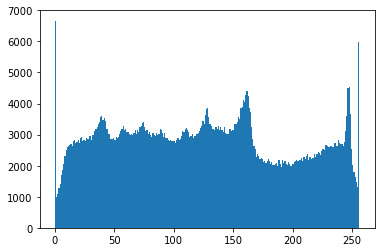

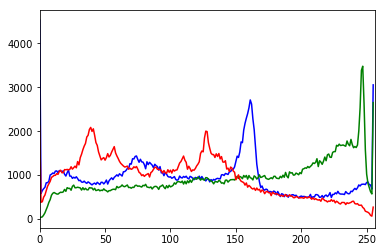

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./images/nature.jpg')

histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# ravel flaten our image array 
plt.hist(image.ravel(),256,[0,256]);plt.show()


color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2,color= col)
    plt.xlim([0,256])
plt.show()    

In [1]:
show(image)

NameError: name 'show' is not defined

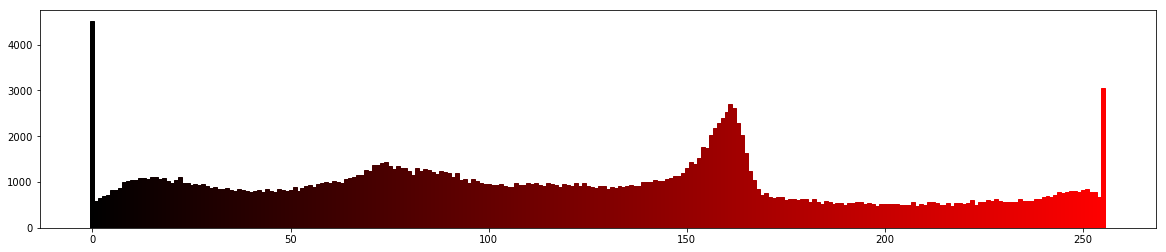

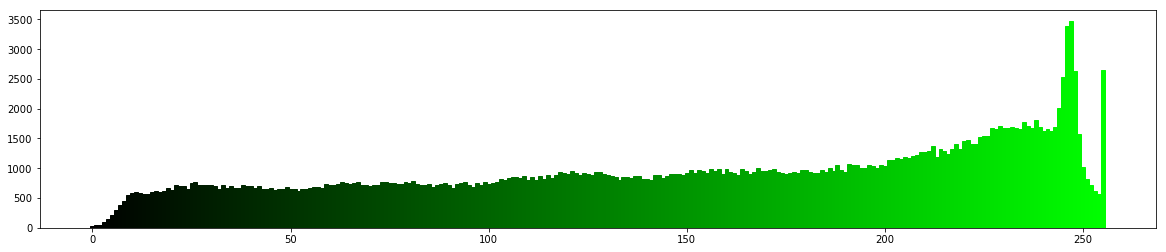

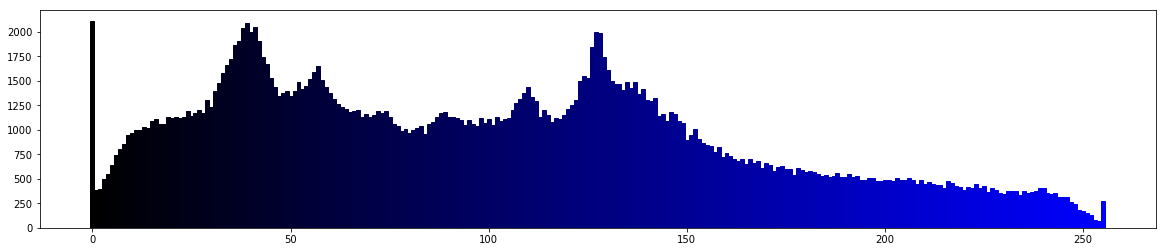

In [4]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)

        plt.show()
        
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./images/nature.jpg')
show_rgb_hist(image)
